In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image



%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [17]:
im=Image.open('../reports/figures/CRISP_DM.png')

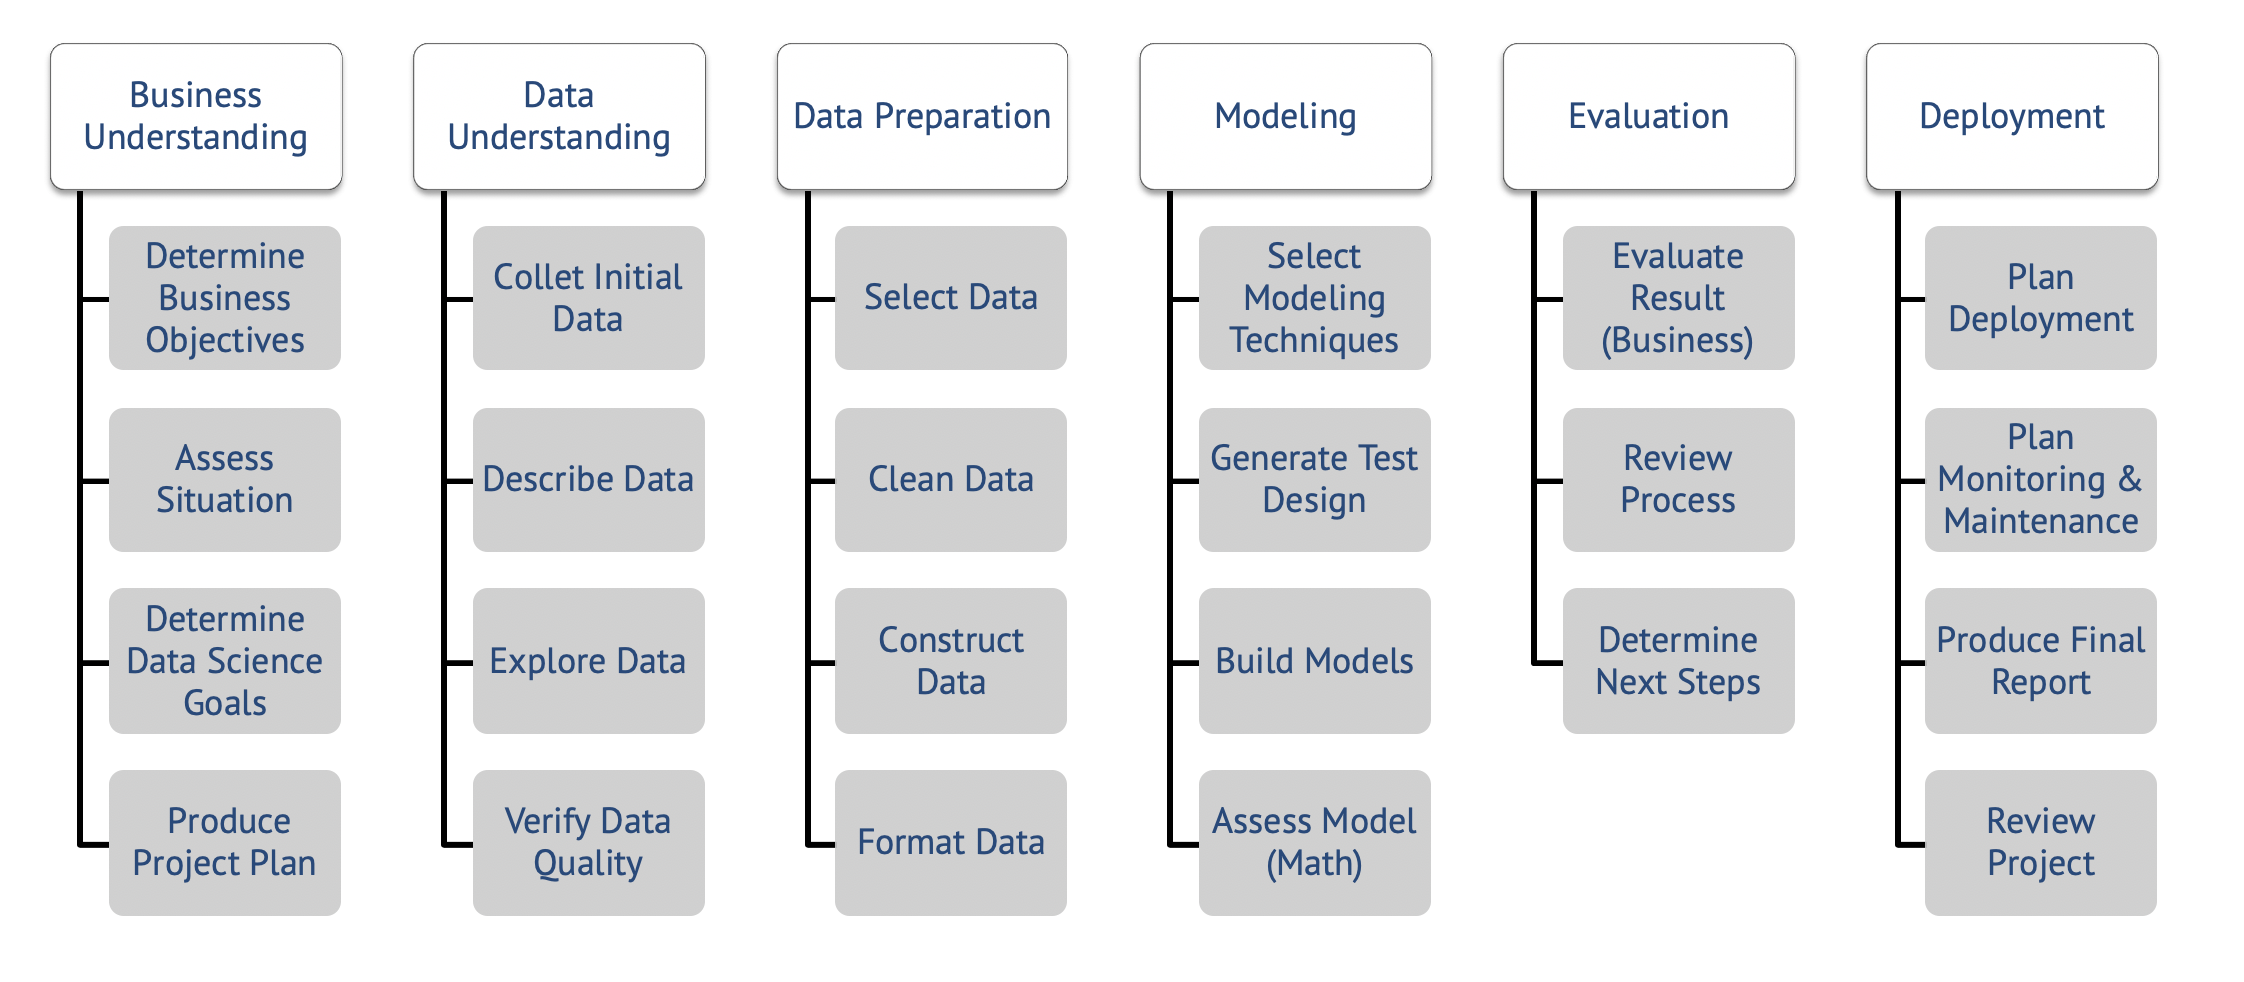

In [18]:
im

# Data load

In [19]:
pd_anlydata=pd.read_csv('../data/processed/COVID_small_Sameer_DR1_table.csv',sep=';')  

pd_anlydata.sort_values('Date',ascending=True).head(50)

,Date,China,Italy,Iran,Germany,"Korea, South",Spain,US,Brazil,India,Russia
0,0,548.0,155.0,245.0,159.0,204.0,165.0,174.0,151.0,156.0,199.0
1,1,643.0,229.0,388.0,196.0,433.0,222.0,222.0,151.0,194.0,253.0
2,2,920.0,322.0,593.0,262.0,602.0,259.0,337.0,162.0,244.0,306.0
3,3,1406.0,453.0,978.0,482.0,833.0,400.0,451.0,200.0,330.0,367.0
4,4,2075.0,655.0,1501.0,670.0,977.0,500.0,519.0,321.0,396.0,438.0
5,5,2877.0,888.0,2336.0,799.0,1261.0,673.0,711.0,372.0,499.0,495.0
6,6,5509.0,1128.0,2922.0,1040.0,1766.0,1073.0,1109.0,621.0,536.0,658.0
7,7,6087.0,1694.0,3513.0,1176.0,2337.0,1695.0,1561.0,793.0,657.0,840.0
8,8,8141.0,2036.0,4747.0,1457.0,3150.0,2277.0,2157.0,1021.0,727.0,1036.0
9,9,9802.0,2502.0,5823.0,1908.0,3736.0,2277.0,2870.0,1546.0,887.0,1264.0


In [25]:
country_list=pd_anlydata.columns[1:]

# Helper functions

In [26]:
def quick_plot(x_in, df_input,y_scale,slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()
    
    if df_input.columns[0]=='doubling every day':
        
        for each in df_input.columns[0:4]:
            fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.5, mode='lines', line = dict(color='black', width=3)))
        for each in df_input.columns[4:]:    # column is date { drop(['Date']}
            fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
        if y_scale =='log':
            fig.update_yaxes(type=y_scale, range=[2,7])
        else:
            fig.update_yaxes(type=y_scale, range=[100,max(list(df_input.iloc[:,4:].max()))])
        
        
           
        
    else:
        
        
        
        for each in df_input.columns:
            fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))  
        if y_scale =='log':
            
            fig.update_yaxes(type=y_scale, range=[2,7])
        else:
            fig.update_yaxes(type=y_scale, range=[0,max(list(df_input.max()))])
        
    
    fig.update_layout(autosize=True,
        width=980,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    
    
    
    
    
    
    
    fig.update_xaxes(tickangle=-45, nticks=20, tickfont=dict(size=14,color="#7f7f7f"))
    
  


    
    
    
    
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()
    
      
    

In [68]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
quick_plot(pd_anlydata.Date,
           pd_anlydata.iloc[:,1:-1],
           y_scale='log',
           slider=True)

# Fitting a polynomial curve



In [107]:
df_polyreg_anly = pd_anlydata.iloc[0:40,1:-1].reset_index()
df_polyreg_anly.head()

,index,China,Italy,Iran,Germany,"Korea, South",Spain,US,Brazil,India
0,0,548.0,155.0,245.0,159.0,204.0,165.0,174.0,151.0,156.0
1,1,643.0,229.0,388.0,196.0,433.0,222.0,222.0,151.0,194.0
2,2,920.0,322.0,593.0,262.0,602.0,259.0,337.0,162.0,244.0
3,3,1406.0,453.0,978.0,482.0,833.0,400.0,451.0,200.0,330.0
4,4,2075.0,655.0,1501.0,670.0,977.0,500.0,519.0,321.0,396.0


In [111]:
df_polyreg_anly.max().max()

index               39.0
China            79932.0
Italy           115242.0
Iran             60500.0
Germany         122171.0
Korea, South      9786.0
Spain           163027.0
US              581813.0
Brazil           43079.0
India            27890.0
dtype: float64

In [92]:
df_polyreg_anly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         40 non-null     int64  
 1   China         40 non-null     float64
 2   Italy         40 non-null     float64
 3   Iran          40 non-null     float64
 4   Germany       40 non-null     float64
 5   Korea, South  40 non-null     float64
 6   Spain         40 non-null     float64
 7   US            40 non-null     float64
 8   Brazil        40 non-null     float64
 9   India         40 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 3.2 KB


In [93]:
df_polyreg_anly.columns

Index(['index', 'China', 'Italy', 'Iran', 'Germany', 'Korea, South', 'Spain',
       'US', 'Brazil', 'India'],
      dtype='object')

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [95]:
def PolynomialRegression(degree=3, **kwargs): ##
    return make_pipeline(PolynomialFeatures(degree), #pipelining commands so that they are executed one after the other
                         LinearRegression(**kwargs))

In [97]:
y=df_polyreg_anly[[ 'Spain','US', 'Brazil', 'India']].unstack().sort_index(axis=0,level=1)

In [98]:
y.head(50)

Spain   0      165.0
US      0      174.0
Brazil  0      151.0
India   0      156.0
Spain   1      222.0
US      1      222.0
Brazil  1      151.0
India   1      194.0
Spain   2      259.0
US      2      337.0
Brazil  2      162.0
India   2      244.0
Spain   3      400.0
US      3      451.0
Brazil  3      200.0
India   3      330.0
Spain   4      500.0
US      4      519.0
Brazil  4      321.0
India   4      396.0
Spain   5      673.0
US      5      711.0
Brazil  5      372.0
India   5      499.0
Spain   6     1073.0
US      6     1109.0
Brazil  6      621.0
India   6      536.0
Spain   7     1695.0
US      7     1561.0
Brazil  7      793.0
India   7      657.0
Spain   8     2277.0
US      8     2157.0
Brazil  8     1021.0
India   8      727.0
Spain   9     2277.0
US      9     2870.0
Brazil  9     1546.0
India   9      887.0
Spain   10    5232.0
US      10    2968.0
Brazil  10    1924.0
India   10     987.0
Spain   11    6391.0
US      11    4360.0
Brazil  11    2247.0
India   11   

In [99]:
test_points=45
y_train=y[0:-test_points-1]
y_test=y[-test_points:]

In [100]:
X_train=np.arange(len(y_train)).reshape(-1, 1)/4.0 
X_test=np.arange(len(y_train),len(y_train)+test_points).reshape(-1, 1)/4.0

In [103]:
X_test

array([[28.5 ],
       [28.75],
       [29.  ],
       [29.25],
       [29.5 ],
       [29.75],
       [30.  ],
       [30.25],
       [30.5 ],
       [30.75],
       [31.  ],
       [31.25],
       [31.5 ],
       [31.75],
       [32.  ],
       [32.25],
       [32.5 ],
       [32.75],
       [33.  ],
       [33.25],
       [33.5 ],
       [33.75],
       [34.  ],
       [34.25],
       [34.5 ],
       [34.75],
       [35.  ],
       [35.25],
       [35.5 ],
       [35.75],
       [36.  ],
       [36.25],
       [36.5 ],
       [36.75],
       [37.  ],
       [37.25],
       [37.5 ],
       [37.75],
       [38.  ],
       [38.25],
       [38.5 ],
       [38.75],
       [39.  ],
       [39.25],
       [39.5 ]])

In [114]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc={'figure.figsize':(16,8)})  # plot formatting, prepare for subplot

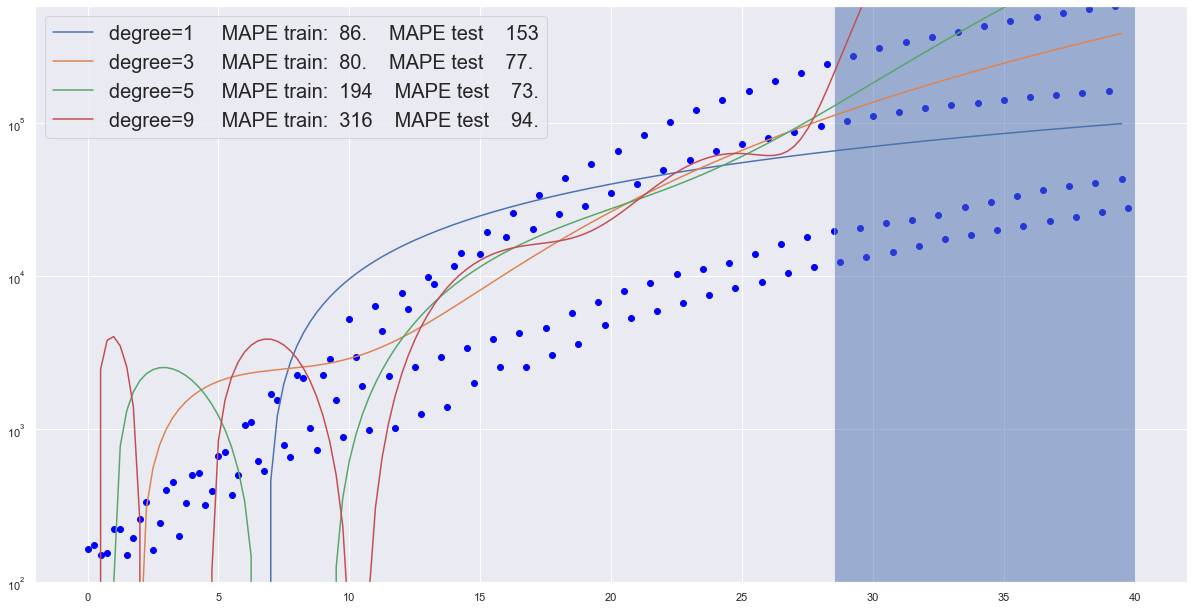

In [121]:
fig = plt.figure()

axis = fig.add_axes([0,0,1,1]) # main axes

axis.scatter(np.arange(len(y))/4,y, color='blue')
axis.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,3,5,9]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)

    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    axis.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 


axis.set_ylim(100, df_polyreg_anly.max().max())
axis.set_yscale('log')
axis.legend(loc=0,prop={'size': 20});

# Regression Metrics (source wikipedia)

## Mean Absolut Error

In statistics, mean absolute error MAE''' is a measure of Errors between paired observations expressing the same phenomenon. 

Comparing examples of ''Y'' (forecasts) versus ''X'' (actual/observe) across time steps
 MAE is calculated as:
 
$\mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i-x_i\right|}{n} =\frac{\sum_{i=1}^n\left| e_i \right|}{n}.$

## Mean Absolut Percentage Error (MAPE)

mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), 
is a measure of prediction accuracy of a forecasting method in [[statistics]],

for example in trend estimation, also used as a loss function for regression problems in machine learning. 
It usually expresses the accuracy as a ratio defined by the formula:

$\mbox{MAPE} = \frac{1}{n}\sum_{i=1}^n  \left|\frac{x_i-y_i}{x_i}\right| $

### if the MAPE is 80, on average, the forecast is off by 80%

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Symmetric mean absolute percentage error

Symmetric mean absolute percentage error (SMAPE''' or '''sMAPE)''' is an accuracy measure based on percentage (or relative) errors. It is usually defined{{Citation needed|reason=S. Makridakis didn't use following definition in his article ''Accuracy measures: theoretical and practical concerns,'' 1993.|date=May 2017}} as follows:

$ \text{SMAPE} = \frac{100\%}{n} \sum_{t=1}^n \frac{\left|F_t-A_t\right|}{(|A_t|+|F_t|)/2}$
